In [83]:
import pandas as pd
!pip install catboost
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import catboost
from sklearn.metrics import recall_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
df = pd.read_csv('train_dataset_train.csv', nrows=1000)
df

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,808C9EEAA6A25916BF7A6B47AE439170,КОШЕЛЕК,393,Чертановская (Северный),9023,Чертановская,9,Серпуховско-Тимирязевская,2022-09-12 05:36:07,729.683333,10022
996,997,92783638E8A8A172B5F4227411CE832F,30 дней,378,Серпуховская,9018,Серпуховская,9,Серпуховско-Тимирязевская,2022-09-12 05:36:08,590.166667,7001
997,998,315E6D26E2346CBB71A293B8BA361710,30 дней ЕДИНЫЙ ТК,2264,Некрасовка (Второй),15002,Некрасовка,15,Некрасовская,2022-09-12 05:36:10,953.416667,6006
998,999,886B74346AEF882F09E823BBBDA5038D,Социальная карта москвича,2264,Некрасовка (Второй),15002,Некрасовка,15,Некрасовская,2022-09-12 05:36:10,754.150000,11008


In [85]:
df[df.isna()==True].count()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [86]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество значений: {df[col].nunique()}")
   

Характеристика: id
Количество значений: 1000
Характеристика: ticket_id
Количество значений: 1000
Характеристика: ticket_type_nm
Количество значений: 28
Характеристика: entrance_id
Количество значений: 279
Характеристика: entrance_nm
Количество значений: 279
Характеристика: station_id
Количество значений: 205
Характеристика: station_nm
Количество значений: 186
Характеристика: line_id
Количество значений: 15
Характеристика: line_nm
Количество значений: 15
Характеристика: pass_dttm
Количество значений: 543
Характеристика: time_to_under
Количество значений: 986
Характеристика: label
Количество значений: 236


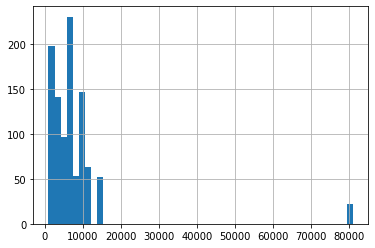

In [87]:
df["label"].hist(bins = 50)

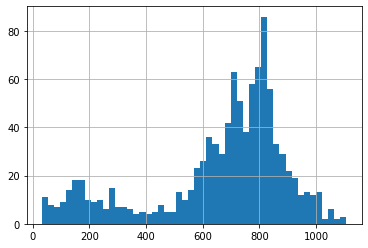

In [88]:
df["time_to_under"].hist(bins = 50)

In [89]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [90]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

In [91]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,18,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,24,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,15,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,0,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,17,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [92]:
df.ticket_type_nm.nunique()

28

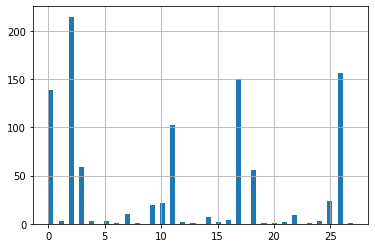

In [93]:
df.ticket_type_nm.hist(bins=60)

In [94]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,18,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,24,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,15,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,0,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,17,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [95]:
df = pd.get_dummies(df, prefix = 'ticket_type', columns = ['ticket_type_nm'])
df = pd.get_dummies(df, prefix = 'station', columns = ['station_id'])

df['pass_dttm'] = pd.to_datetime(df['pass_dttm'])
df['hour'] = df['pass_dttm'].dt.hour

df['time_of_day'] = df['hour'].apply(
    lambda hour: 'AM' if hour>=0 and hour<=7 else 'PM' )

df = df.drop(columns = 'pass_dttm')

df = pd.get_dummies(df, prefix = 'time_of_day', columns = ['time_of_day'])



In [96]:
categorical_features = ['ticket_type_nm', 'entrance_id', 'station_id', 'line_id', 'label']

X = df.drop(columns=['time_to_under', 'label', 'ticket_id', 'entrance_nm', 'station_nm' , 'line_nm','hour'])
y = df['time_to_under']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X                                                   


,id,entrance_id,line_id,ticket_type_0,ticket_type_1,ticket_type_2,ticket_type_3,ticket_type_4,ticket_type_5,ticket_type_6,...,station_15006,station_81006,station_81010,station_81011,station_81012,station_81013,station_81014,station_81015,station_81016,time_of_day_AM
0,1,2402,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,110,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,393,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,997,378,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,998,2264,15,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,999,2264,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
clf = catboost.CatBoostRegressor()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

r2 = r2_score(y_test, y_predict)
r2

Learning rate set to 0.038699
0:	learn: 238.6395402	total: 1.68ms	remaining: 1.67s
1:	learn: 236.9348899	total: 3.09ms	remaining: 1.54s
2:	learn: 235.2788186	total: 6.53ms	remaining: 2.17s
3:	learn: 233.6252809	total: 7.97ms	remaining: 1.98s
4:	learn: 232.2640554	total: 9.55ms	remaining: 1.9s
5:	learn: 230.8491802	total: 11.2ms	remaining: 1.85s
6:	learn: 230.0838942	total: 12.9ms	remaining: 1.82s
7:	learn: 228.9021204	total: 14.5ms	remaining: 1.8s
8:	learn: 227.7445951	total: 16.2ms	remaining: 1.78s
9:	learn: 226.6822299	total: 17.8ms	remaining: 1.77s
10:	learn: 225.5532740	total: 19.5ms	remaining: 1.75s
11:	learn: 224.5789260	total: 21.1ms	remaining: 1.74s
12:	learn: 223.6671079	total: 22.8ms	remaining: 1.73s
13:	learn: 222.6586166	total: 24.4ms	remaining: 1.72s
14:	learn: 221.7104701	total: 26ms	remaining: 1.71s
15:	learn: 221.1336512	total: 27.6ms	remaining: 1.7s
16:	learn: 220.6695841	total: 29.3ms	remaining: 1.69s
17:	learn: 219.9190610	total: 31.3ms	remaining: 1.71s
18:	learn: 21

0.31219830170242224

In [98]:
X = df.drop(columns=['time_to_under', 'label', 'ticket_id', 'entrance_nm', 'station_nm' , 'line_nm','hour'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                                    
clf = RandomForestClassifier(n_estimators = 30)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [99]:
recall = recall_score(y_test, y_predict, average='macro')
recall

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.05114587485053806

In [100]:
score = 0.5*(recall+r2)
score

0.18167208827648015